<img src="../pic.jpg" style="width:1100px;height:600px;">

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol style='color:#000;'>
        <li><a href="#intro">Introduction</a></li>
        <li><a href="#data">Data Selection</a></li>
        <li><a href="#data_cleaning">Data Cleaning</a></li>
        <li><a href="#eda">Exploratory Data Analysis</a></li>
        <li><a href="#results">Results</a></li>
    </ol>
</div>
<br>
<hr>


<div id='intro'>
    <h3>1. Introduction</h3>
        <blockquote><p>Globally, road traffic injuries are currently estimated to be inclusive of the eighth leading causes of death across all age groups. Occasionally these traffic injuries are influenced with multiple factors which some of which include wreck less driving, drunk driving, negligence on the road, bad weather conditions, special events, traffic jams, and lastly bad infrastructure.</p></blockquote>
<blockquote><p>Analysis of some of the above mentioned contributions to road severities to make a model for predicting the chances of these accidents can be designed and implemented for future use.</p></blockquote>
<blockquote><p>Such insights, could allow law enforcement bodies to allocate their resources more effectively in advance of potential accidents, preventing when and where a severe accident is bound to occur. By so doing, it will result in saving resources, life and unnecessary expenses unaccounted for. If the system is well adopted, and cities trust the predictions from the model, nations could be forewarned before the execution of accidents by announcing on radios, and broadcasting on televisions which routes to use on a particular day to avoid traffic jams or to suffer the effects of bad weather.</p></blockquote>
<blockquote><p>Governments should be highly interested in accurate predictions of the severity of an accident, in order to reduce the time of arrival and thus save a significant amount of people each year. Others interested could be private companies investing in technologies aiming to improve road safeness.
Why run costs for rushing the injured to the hospital, fuelling fire trucks to accident scenes to rescue the injured when it can be avoided before it happens. As with most Governments that have its people at heart, they should be more interested in adopting the severity predicting systems for the safety of its people.</p>
</blockquote>
</div>
<hr>

<div id='data'>
    <h3>2. Data Selection</h3>
    <div>
        <blockquote>The original dataset for this project was downloaded from the Applied Data Science Capstone Project from the following links : <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv">Dataset</a> along with its <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf">Metadata</a> file. I selected the most relevant attributes for use as features for the prediction of accident severity.</blockquote>
    </div><br>
    <blockquote><strong><u><h4>The features of the dataset resulting are listed in the table below:</h4></u></strong></blockquote>
</div>

| Attribute/Feature | Data type,length | Description |
| :- | :- | -: |
| SEVERITYCODE | Text, 100  |  A code that corresponds to the severity of the collision:•3—fatality • 2b—serious injury • 2—injury • 1—prop damage • 0—unknown |
| COLLISIONTYPE | Text, 300  | collision type |
| OBJECTID | ObjectID | ESRI unique identifier |
| ADDRTYPE | Text, 12  | Collision address type: • Alley • Block • Intersection |
| PERSONCOUNT | Double | The total number of people involved in the collision |
| PEDCOUNT | Double | The number of pedestrians involved in the collision. This is entered by the state. |
| PEDCYLCOUNT | Double | The number of bicycles involved in the collision. This is entered by the state. |
| VEHCOUNT | Double | The number of vehicles involved in the collision. This is entered by the state. |
| INJURIES | Double | The number of total injuries in the collision. This is entered by the state. |
| SERIOUSINJURIES | Double | The number of serious injuries in the collision. This is entered by the state. |
| FATALITIES | Double | The number of fatalities in the collision. This is entered by the state. |
| JUNCTIONTYPE | Text, 300 | Category of junction at which collision took place |
| WEATHER | Text, 300 | A description of the weather conditions during the time of the collision |
| ROADCOND | Text, 300 | The condition of the road during the collision. |
| LIGHTCOND | Text, 300 | The light conditions during the collision |
| HITPARKEDCAR | Text, 1 | Whether or not the collision involved hitting a parked car. (Y/N) |

<div id='data_cleaning'>
    <h3>3. Data Cleaning</h3>
    <div>
        <blockquote>The main aim of Data Cleaning is to identify and remove errors and duplicate data, in order to create a reliable dataset. This improves the quality of the training data for analytics and enables accurate decision-making.
        </blockquote>
        <br>
        <blockquote>
           <strong><u><h4>The following listes processes will be executed:</h4></u></strong>
                <ol style='color:#000;'>
                    <li>Filling-out missing values</li>
                    <li>Removing rows with missing values</li>
                    <li>Fixing errors in the structure</li>
                    <li>Reducing data for proper data handling</li>
                </ol>
        </blockquote>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8.27)})

import matplotlib.pyplot as plt

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv("Data-Collisions.csv", sep='\t')

### Check for missing values

In [3]:
data.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [4]:
#drop all the rows with NAN values on the Severity column
data = data.dropna(subset=['SEVERITYCODE','COLLISIONTYPE','WEATHER','LIGHTCOND','ROADCOND','JUNCTIONTYPE', 'ADDRTYPE'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182895 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    182895 non-null  int64  
 1   X               180067 non-null  float64
 2   Y               180067 non-null  float64
 3   OBJECTID        182895 non-null  int64  
 4   INCKEY          182895 non-null  int64  
 5   COLDETKEY       182895 non-null  int64  
 6   REPORTNO        182895 non-null  object 
 7   STATUS          182895 non-null  object 
 8   ADDRTYPE        182895 non-null  object 
 9   INTKEY          63298 non-null   float64
 10  LOCATION        182660 non-null  object 
 11  EXCEPTRSNCODE   75409 non-null   object 
 12  EXCEPTRSNDESC   1829 non-null    object 
 13  SEVERITYCODE.1  182895 non-null  int64  
 14  SEVERITYDESC    182895 non-null  object 
 15  COLLISIONTYPE   182895 non-null  object 
 16  PERSONCOUNT     182895 non-null  int64  
 17  PEDCOUNT  

In [6]:
data.head(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,27/3/2013,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,20/12/2006,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


In [7]:
data = data[['SEVERITYCODE','INCKEY', 'OBJECTID',  'ADDRTYPE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'JUNCTIONTYPE',
    'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182895 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   182895 non-null  int64 
 1   INCKEY         182895 non-null  int64 
 2   OBJECTID       182895 non-null  int64 
 3   ADDRTYPE       182895 non-null  object
 4   COLLISIONTYPE  182895 non-null  object
 5   PERSONCOUNT    182895 non-null  int64 
 6   PEDCOUNT       182895 non-null  int64 
 7   PEDCYLCOUNT    182895 non-null  int64 
 8   VEHCOUNT       182895 non-null  int64 
 9   INCDATE        182895 non-null  object
 10  JUNCTIONTYPE   182895 non-null  object
 11  WEATHER        182895 non-null  object
 12  ROADCOND       182895 non-null  object
 13  LIGHTCOND      182895 non-null  object
 14  HITPARKEDCAR   182895 non-null  object
dtypes: int64(7), object(8)
memory usage: 22.3+ MB


In [9]:
data['INCDATE'][0:4]

0     27/3/2013
1    20/12/2006
2    18/11/2004
3     29/3/2013
Name: INCDATE, dtype: object

In [10]:
data['INCDATE'] = pd.to_datetime(data['INCDATE'])

In [11]:
data.head()

,SEVERITYCODE,INCKEY,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,1307,1,Intersection,Angles,2,0,0,2,2013-03-27,At Intersection (intersection related),Overcast,Wet,Daylight,N
1,1,52200,2,Block,Sideswipe,2,0,0,2,2006-12-20,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N
2,1,26700,3,Block,Parked Car,4,0,0,3,2004-11-18,Mid-Block (not related to intersection),Overcast,Dry,Daylight,N
3,1,1144,4,Block,Other,3,0,0,3,2013-03-29,Mid-Block (not related to intersection),Clear,Dry,Daylight,N
4,2,17700,5,Intersection,Angles,2,0,0,2,2004-01-28,At Intersection (intersection related),Raining,Wet,Daylight,N


In [12]:
data.ADDRTYPE.unique()

array(['Intersection', 'Block', 'Alley'], dtype=object)

In [13]:
data.corr()

,SEVERITYCODE,INCKEY,OBJECTID,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.034259,0.033629,0.124545,0.245656,0.214043,-0.081166
INCKEY,0.034259,1.000000,0.950204,-0.049568,0.032564,0.038304,-0.014410
OBJECTID,0.033629,0.950204,1.000000,-0.049725,0.031752,0.041075,-0.014870
PERSONCOUNT,0.124545,-0.049568,-0.049725,1.000000,-0.027211,-0.042725,0.399674
PEDCOUNT,0.245656,0.032564,0.031752,-0.027211,1.000000,-0.018662,-0.317361
PEDCYLCOUNT,0.214043,0.038304,0.041075,-0.042725,-0.018662,1.000000,-0.307314
VEHCOUNT,-0.081166,-0.014410,-0.014870,0.399674,-0.317361,-0.307314,1.000000


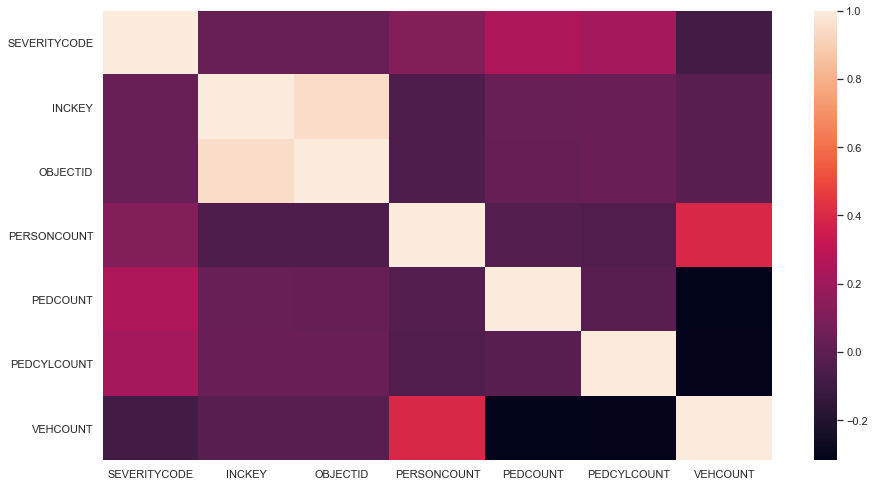

In [14]:
sns.heatmap(data.corr())
plt.show()

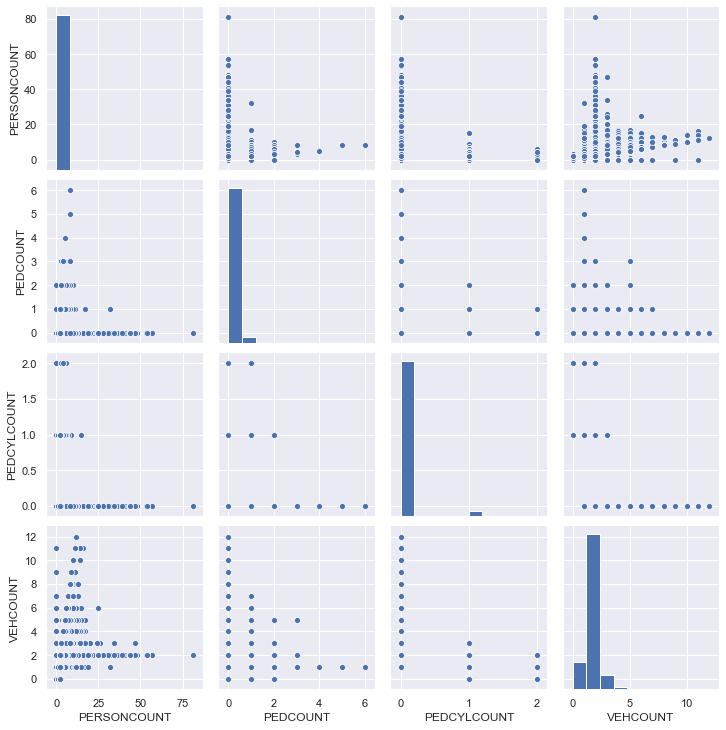

In [15]:
sns.pairplot(data[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']], diag_kind='auto')

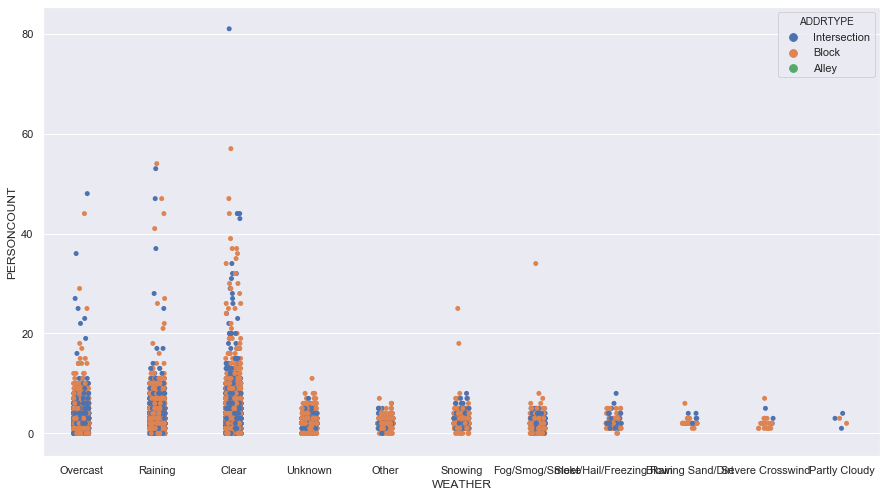

In [16]:
sns.stripplot(data.WEATHER, data.PERSONCOUNT, hue='ADDRTYPE' , data=data, jitter=True)
plt.show()

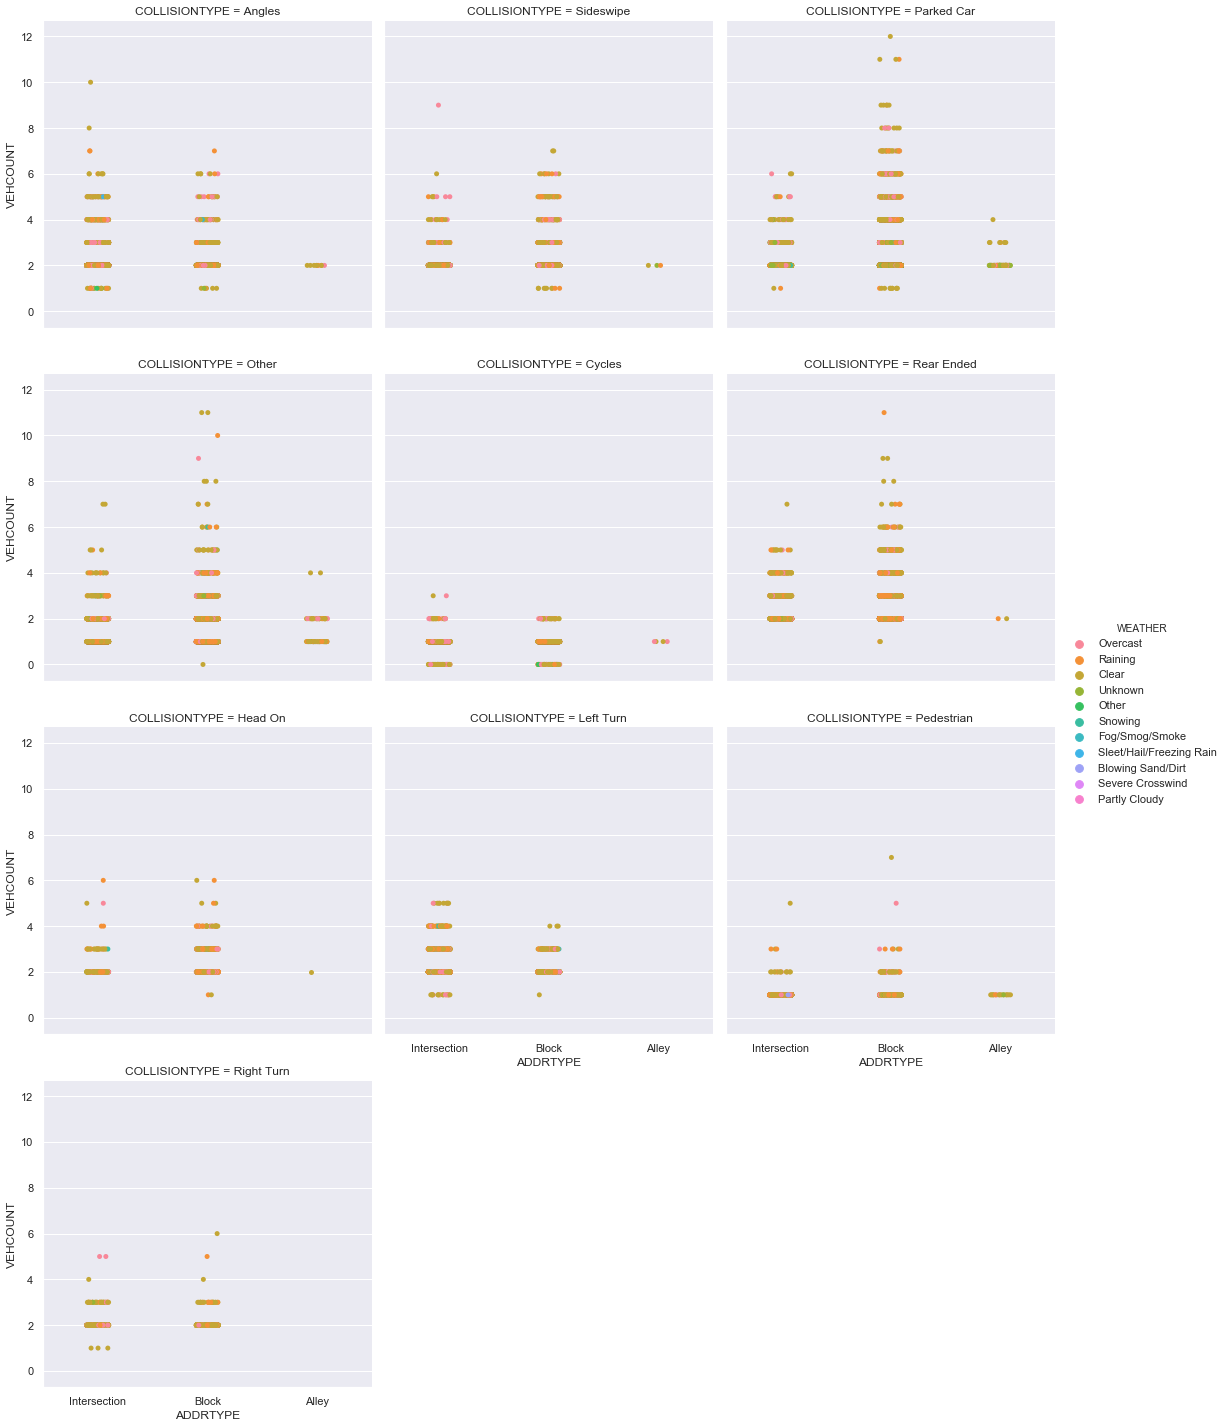

In [17]:
sns.catplot(x='ADDRTYPE', y='VEHCOUNT', col='COLLISIONTYPE', col_wrap=3, hue='WEATHER', data=data, aspect=1.0)
plt.show()

<div id='eda'>
    <h3>3. EDA</h3>
    <div>
        <blockquote>This section aims to gain a better understanding of the data summarizing the main characteristics as well as uncovering important relationships of the features with the severity of an accident
        </blockquote>
        <br>
        <blockquote>
           <strong><u><h4>Target SEVERITYCODE</h4></u></strong>
            <p>The data is almost evenly distributed on both high and low severity accidents.</p>
        </blockquote>
    </div>
</div>

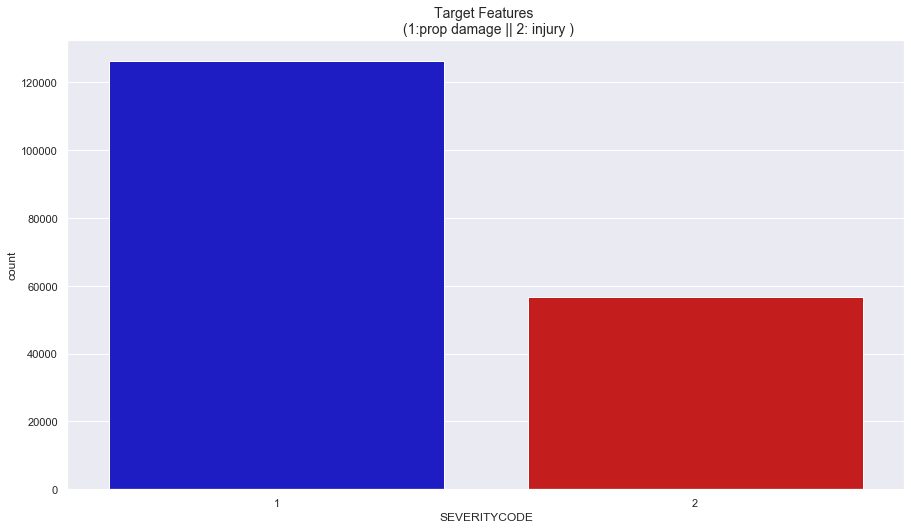

In [18]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('SEVERITYCODE', data=data, palette=colors)
plt.title('Target Features \n (1:prop damage || 2: injury )', fontsize=14)
plt.show()

<h3>Frequency</h3>
<blockquote>The number of traffic accidents decreased over the years from 2004 to 2020, after which in 2013, to date, a rise in accidents is notiiceable towards every new 
    year. Analyszing the yearly trend there is a seasonal pattern where the number of accidents increase around March and then again in September. Regarding the day of the week there is not a significant difference between them. There is a steady trend during the week with more accidents on Friday, and Sunday is the day with less accident of all. Lastly analyzing the accidents per hour, there are clearly two spikes, one at 8am, the time people go to work and another one between 5 and 6pm, the time when people return home. The number of accidents decreases between these two spikes, nothing unusual but it proves there exists a pattern.</blockquote>

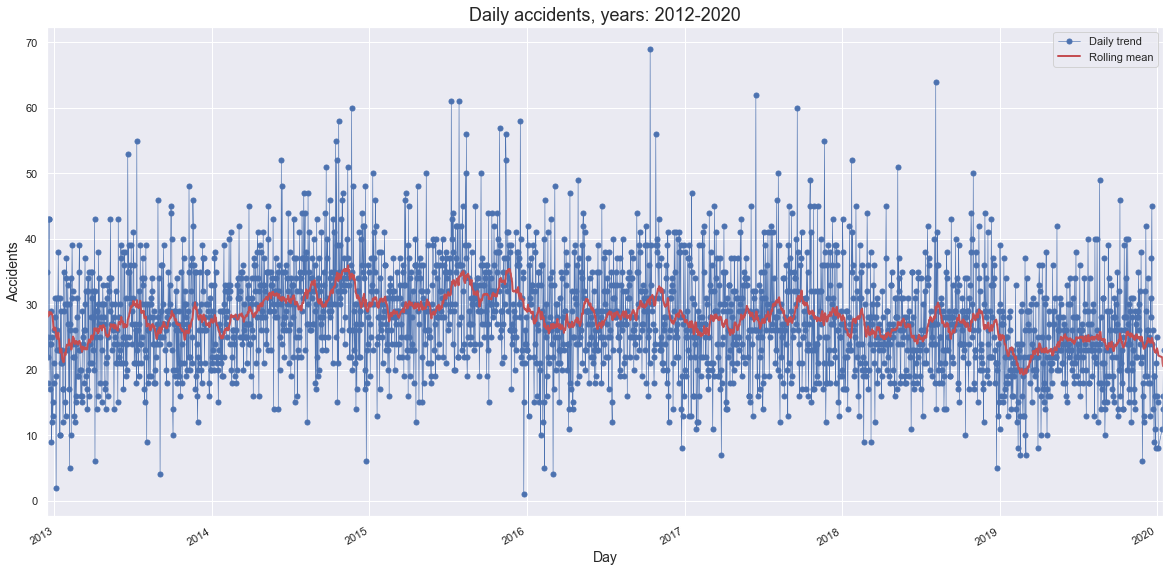

In [19]:
data['year'] = data.INCDATE.dt.year
data['month'] = data.INCDATE.dt.month
data['weekday'] = data.INCDATE.dt.weekday
high_sev = data[data['SEVERITYCODE']==2]

season = data[['INCDATE', 'INCKEY']].groupby('INCDATE').count()
season['rolling'] = season.INCKEY.rolling(window=30).mean()
season['INCKEY'][365*8:].plot(figsize=(20,10), marker='o', markersize=5, linewidth=0.6, label='Daily trend')
season['rolling'][365*8:].plot(color='r', linewidth=2, label='Rolling mean')
plt.title('Daily accidents, years: 2012-2020', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Accidents', size=14)

t0 = dt.datetime.strptime('2012-12-15', '%Y-%m-%d')
t1 = dt.datetime.strptime('2020-01-15', '%Y-%m-%d')

plt.xlim(t0,t1)
plt.legend()
plt.show()

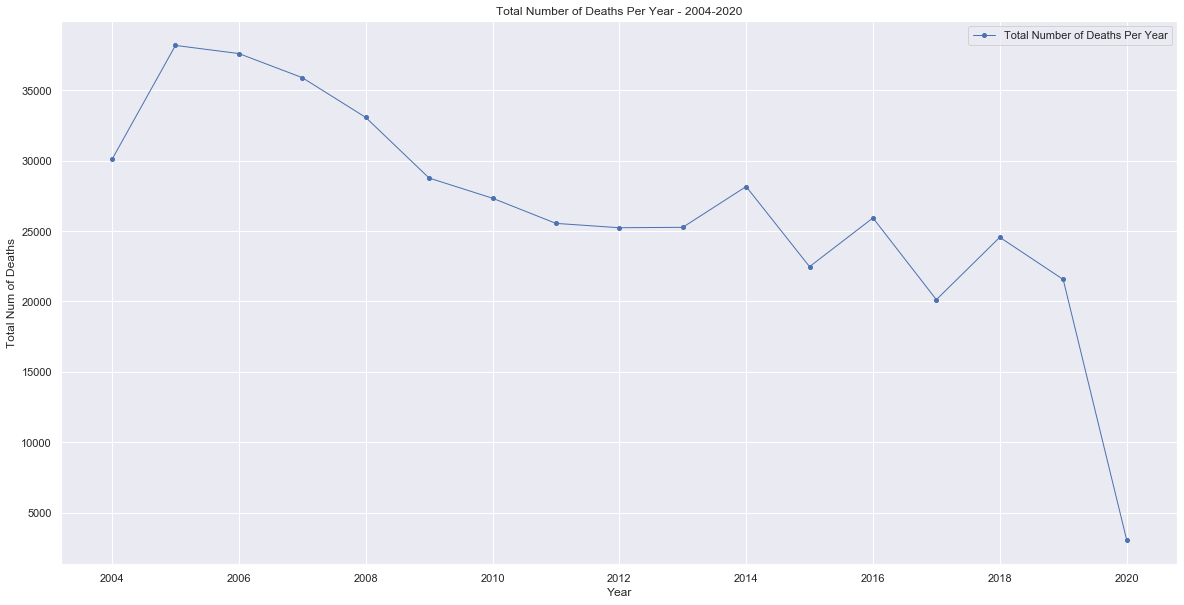

In [20]:
#By Year
by_year = data.groupby(data['INCDATE'].dt.year)['PERSONCOUNT'].sum()
by_year.plot(figsize=(20,10), marker='o', markersize=4, linewidth=1, label='Total Number of Deaths Per Year')
plt.legend()
plt.title('Total Number of Deaths Per Year - 2004-2020')
plt.xlabel('Year')
plt.ylabel('Total Num of Deaths')
plt.show()

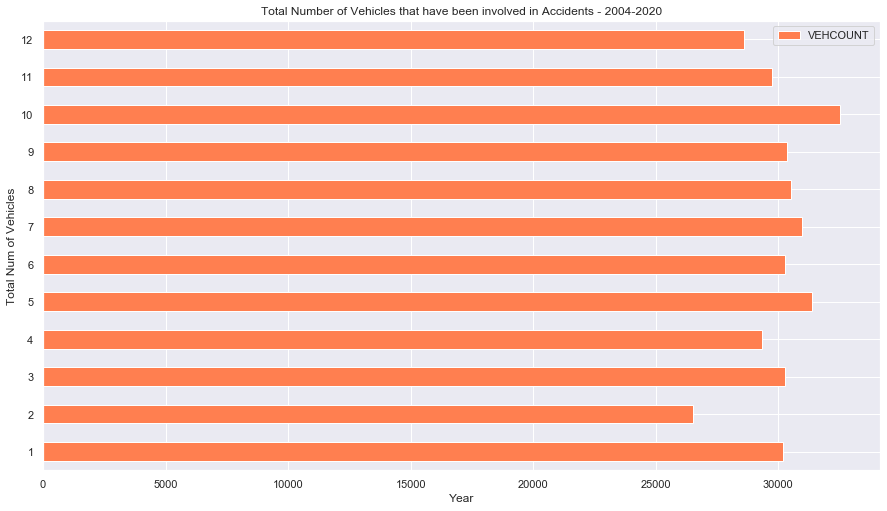

In [21]:
#By month
by_month = data.groupby(data['INCDATE'].dt.month)['VEHCOUNT'].sum()
by_month.plot.barh(color='coral')
plt.legend()
plt.title('Total Number of Vehicles that have been involved in Accidents - 2004-2020')
plt.xlabel('Year')
plt.ylabel('Total Num of Vehicles')
plt.show()

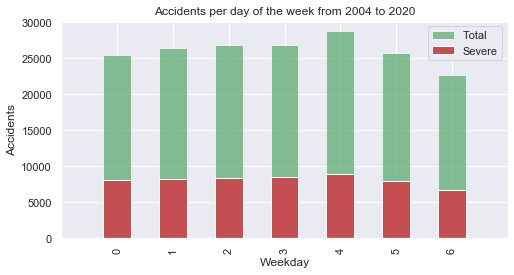

In [22]:
#By day of the week

weekday = data[['weekday', 'INCKEY']].groupby('weekday').count()
weekday['SEVERITYCODE'] = high_sev[['weekday', 'INCKEY']].groupby(['weekday']).count()
weekday['INCKEY'].plot.bar(figsize=(8,4), alpha=0.7, color='g', label='Total')
weekday['SEVERITYCODE'].plot.bar(color='r', label='Severe')

plt.title('Accidents per day of the week from 2004 to 2020')
plt.xticks(range(7))
plt.xlim(-1,7)
# plt.ylim(75000,150000)
plt.xlabel('Weekday')
plt.ylabel('Accidents')
plt.legend()
plt.show()

<h3>Correlation</h3>

In [23]:
data[['SEVERITYCODE','INCKEY', 'OBJECTID',  'ADDRTYPE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'JUNCTIONTYPE',
    'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']].corr()['SEVERITYCODE'].sort_values(ascending=False)

SEVERITYCODE    1.000000
PEDCOUNT        0.245656
PEDCYLCOUNT     0.214043
PERSONCOUNT     0.124545
INCKEY          0.034259
OBJECTID        0.033629
VEHCOUNT       -0.081166
Name: SEVERITYCODE, dtype: float64

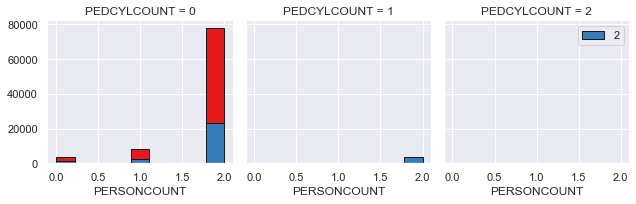

In [24]:
bins = np.linspace(data.PEDCYLCOUNT.min(), data.PEDCYLCOUNT.max(), 10)
g = sns.FacetGrid(data, col="PEDCYLCOUNT", hue="SEVERITYCODE", palette="Set1", col_wrap=3)
g.map(plt.hist,'PERSONCOUNT', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

<div id='data_preparation'>
    <h3>5. Data Preparation</h3>
    <div>
        <blockquote>
            Step right before the model development. The data preparation consists of the normalization and the train/test/validation split. Also the models I will use to predict the severity of an accident.
        </blockquote>
     </div>
</div>

In [25]:
data = data[['SEVERITYCODE','INCKEY', 'OBJECTID',  'ADDRTYPE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'JUNCTIONTYPE',
    'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']]

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop('SEVERITYCODE', axis=1), data['SEVERITYCODE'], test_size=0.2, random_state=8)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2)

In [28]:
print('Size of training set:', xtrain.shape[0],'\n'
      'Size of test set:',xtest.shape[0],'\n'
      'Size of evaluation set:', xval.shape[0])

Size of training set: 117052 
Size of test set: 36579 
Size of evaluation set: 29264


<div id='model'>
    <h3>6. Model Development</h3>
</div>

In [29]:
#importing models 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation Metrics
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_curve

In [30]:
le = LabelEncoder()

In [31]:
categorical_feature_mask = data.dtypes==object
categorical_cols = data.columns[categorical_feature_mask].tolist()
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

In [32]:
Features = data[categorical_cols]

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(Features, data['SEVERITYCODE'], test_size=0.2, random_state=8)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2)

<h5> (i) Logistic Regression</h5>

In [34]:
acc = np.zeros(6)
i=0
for c in [0.5, 0.1, 0.01, 0.001,10,100]:
    lr = LogisticRegression(C=c, solver='liblinear').fit(xtrain, ytrain)
    yhat = lr.predict(xval)
    acc[i] = accuracy_score(yval, yhat)
    i += 1
acc

array([0.68937944, 0.68937944, 0.68937944, 0.68924276, 0.68937944,
       0.68937944])

In [35]:
#Evaluation
t0 = time.time()
lr = LogisticRegression(C=0.01, solver='liblinear').fit(xtrain, ytrain)
t_lr = time.time()-t0
print('Time taken :', t_lr)
yhat = lr.predict(xtest)
jaccard_lr = jaccard_similarity_score(ytest, yhat)
c_lr = classification_report(ytest, yhat)
prec_lr = precision_score(ytest, yhat)
rec_lr = recall_score(ytest, yhat)
print('Jaccard :', jaccard_lr,'\n',
     c_lr)

Time taken : 0.5216574668884277
Jaccard : 0.6899860575740179 
               precision    recall  f1-score   support

           1       0.69      0.99      0.82     25308
           2       0.40      0.01      0.02     11271

    accuracy                           0.69     36579
   macro avg       0.55      0.50      0.42     36579
weighted avg       0.60      0.69      0.57     36579



<h5>(ii) KNN</h5>

In [36]:
tt = xtrain.shape[0]
tv = xval.shape[0]
xtrain[int(tt*0.5):].shape[0], xval[int(tv*0.5):].shape[0]

(58526, 14632)

In [37]:
ks = 17
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xtrain[int(tt*0.5):],ytrain[int(tt*0.5):])
    yhat = neigh.predict(xval[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(yval[int(tv*0.5):],yhat)
    std_acc[n-1] = np.std(yhat==yval[int(tv*0.5):])/np.sqrt(yhat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))

Best performing K is 16 with an accuracy of 0.7234144341170038


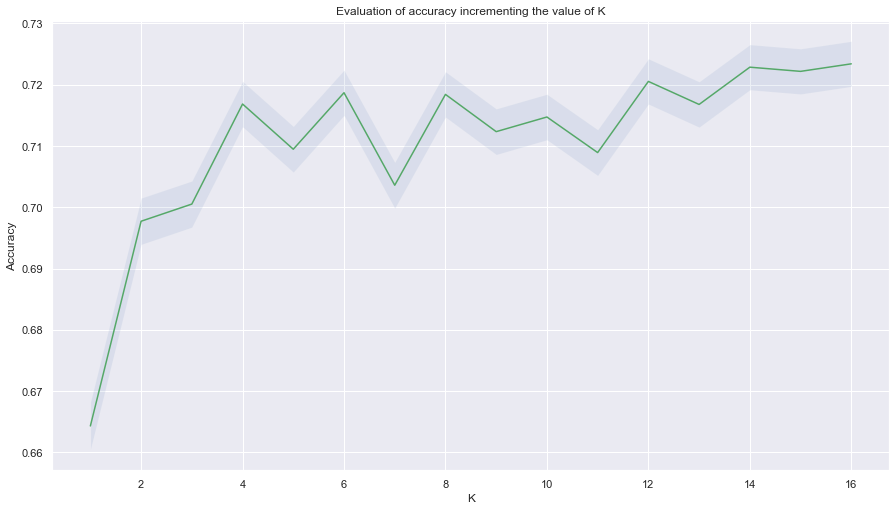

In [38]:
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)
plt.show()

In [39]:
t0=time.time()
model_knn = KNeighborsClassifier(n_neighbors = 14, n_jobs=-1)
model_knn.fit(xtrain,ytrain)
t_knn = time.time()-t0
print('Time taken :' , t_knn)
yhat = model_knn.predict(xtest)
jaccard_knn = jaccard_similarity_score(ytest,yhat)
c_knn = classification_report(ytest,yhat)
prec_knn = precision_score(ytest, yhat)
rec_knn = recall_score(ytest, yhat)
print('Jaccard :',jaccard_knn,'\n',
     c_knn)

Time taken : 19.459805727005005
Jaccard : 0.71948385685776 
               precision    recall  f1-score   support

           1       0.75      0.89      0.81     25308
           2       0.57      0.34      0.43     11271

    accuracy                           0.72     36579
   macro avg       0.66      0.62      0.62     36579
weighted avg       0.70      0.72      0.70     36579



<h5> (iii) SVM</h5>

In [40]:
size = [1000,5000,10000,12000,15000,20000,30000,40000,50000,75000,100000]
acc = []
t = []
for s in size:
    t0=time.time()
    sv = SVC().fit(xtrain[:s],ytrain[:s])
    t.append(time.time()-t0)
    yhat = sv.predict(xval[:s])
    acc.append(jaccard_similarity_score(yval[:s],yhat))

In [41]:
performance = pd.DataFrame({'acc':acc, 'time':t}, index=size)
performance

,acc,time
1000,0.716000,0.049177
5000,0.692600,0.902613
10000,0.688400,3.660724
12000,0.686750,4.962775
15000,0.684733,7.123314
20000,0.687300,12.800217
30000,0.689995,27.066808
40000,0.689995,51.054285
50000,0.689995,79.882799
75000,0.693378,408.593119


Text(0.5, 1.0, 'Time(s)')

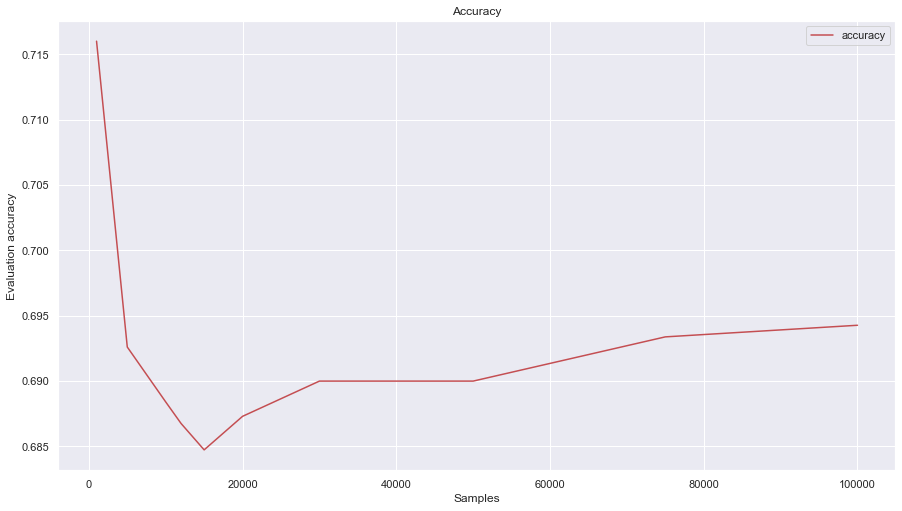

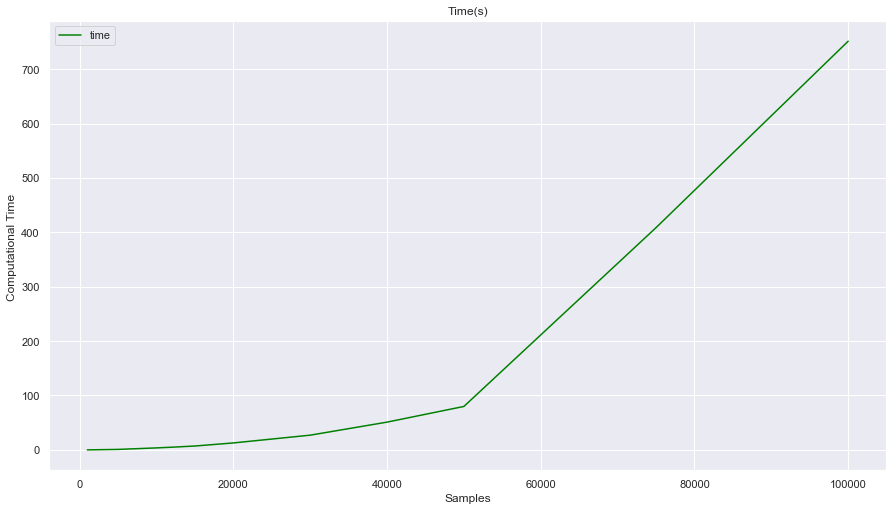

In [42]:
performance.plot(y='acc', color='r', label='accuracy')
plt.xlabel('Samples')
plt.ylabel('Evaluation accuracy')
plt.title('Accuracy')
performance.plot(y='time', color='green', label='time')
plt.xlabel('Samples')
plt.ylabel('Computational Time ')
plt.title('Time(s)')

In [43]:
#Evaluation

s=75000
t0=time.time()
sv = SVC().fit(xtrain[:s],ytrain[:s])
t_svm = time.time()-t0
print('Time taken :' , t_svm)
yhat = sv.predict(xtest[:s])
jaccard_svm = jaccard_similarity_score(ytest[:s],yhat)
c_svm = classification_report(ytest[:s],yhat)
prec_svm = precision_score(ytest[:s], yhat)
rec_svm = recall_score(ytest[:s], yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 405.03490686416626
Jaccard : 0.6899860575740179 
               precision    recall  f1-score   support

           1       0.69      0.99      0.82     25308
           2       0.40      0.01      0.02     11271

    accuracy                           0.69     36579
   macro avg       0.55      0.50      0.42     36579
weighted avg       0.60      0.69      0.57     36579



In [44]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 4.645965099334717
Accuracy : 0.7408761618370694


<div id='results'>
    <h3>5. Results</h3>
</div>

|Algorithm | Jaccard | f1-score | Precision | Recall | Time(s)|
|--- |--- |--- |--- |--- |--- |
|Logistic Regression | 0.69 | 0.82 | 0.69 | 0.99 |  0.53
|KNN| 0.72 | 0.83 | 0.74 | 0.89 | 19.49
|SVM| 0.69 | 0.82 | 0.69 | 0.99 | 393.62

<p>For this specific problem precision means the % of predicted severe accidents that were truly severe. The recall instead, is the % of truly severe accidents that were properly predicted. For this specific problem, the recall is more important than the precision as a high recall will favor that all required resources will be equipped up to the severity of the accident. <br><br>In this case, the recall is more important than the precision as a high recall will favor that all required resources will be equipped up to the severity of the accident. The logistic regression and SVM models have similar accuracy, however the computational time from the regression is far better than the other two models. With no doubt the logistic regression is the best model. It improves has the accuracy of 0.69 and a total execution time of 0.53 seconds.</p>

In [46]:
print('Jaccard:',jaccard_lr,'Precision:',prec_lr,'Recall:',rec_lr)
print('Jaccard:',jaccard_knn,'Precision:',prec_knn,'Recall:',rec_knn)
print('Jaccard:',jaccard_svm,'Precision:',prec_svm,'Recall:',rec_svm)

Jaccard: 0.6899860575740179 Precision: 0.692725867873503 Recall: 0.9918997945313734
Jaccard: 0.71948385685776 Precision: 0.7523225005869135 Recall: 0.8863600442547811
Jaccard: 0.6950436042538068 Precision: 0.6949180553642749 Recall: 0.9968784574047732
